In [1]:
import matplotlib.pyplot as plt
import numpy as np
from metpy.units import units

import metpy.calc as mpcalc

from glidar_model.convection_model import ModelParams, ThermalModel
from glidar_model.parcel_profile import CachedParcelProfile, ParcelProfile, ParcelProfileBuilder, SimpleParcelProfile
from glidar_model.synthetic_profile import SyntheticProfileBuilder, SyntheticProfileParams
from glidar_model.sounding_profile import SoundingProfileBuilder

from glidar_model.model_manager import Model

In [10]:
params = ModelParams(10 * units.celsius,
                     0.7 * units.delta_degree_Celsius,
                     1 * units.celsius,
                     -2 * units.delta_degree_Celsius,
                     100 * units.meter,
                     drag_coeff=0.01,
                     entrainment_coeff=1,
                     humidity_entrainment_coeff=2)

t = 9 * units.celsius
dp = 0 * units.celsius
h = 1000 * units.meter
dpi = -15 * units.celsius
ti = 3 * units.delta_degree_Celsius

sp = SyntheticProfileParams(t, ti, h, dp, dpi)

builder = SyntheticProfileBuilder()
profile = builder.get_profile(sp)

bckg = SoundingProfileBuilder(profile)
parcel = SimpleParcelProfile(profile.pressure)

model = Model(bckg, parcel)

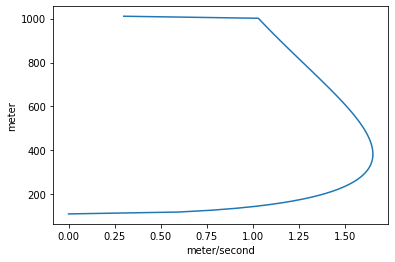

In [11]:
result = model.run_model(params)
w, z = result.velocity_profile

plt.plot(w, z)
plt.show()

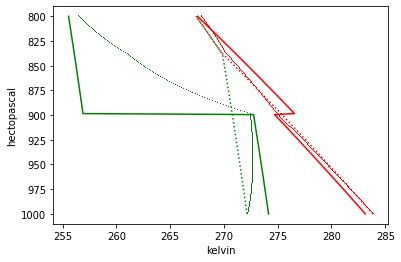

In [12]:

background_profile = result.background_profile
parcel_profile = result.parcel_profile
ent_profile = result.entrained_profile

plt.plot(figsize=(10,10))

plt.plot(background_profile.temperature, background_profile.pressure, 'r-', label='temperature')
plt.plot(background_profile.dewpoint, background_profile.pressure, 'g-', label = 'dewpoint')

plt.plot(parcel_profile.temperature, parcel_profile.pressure, 'r:', label='temperature')
plt.plot(parcel_profile.dewpoint, parcel_profile.pressure, 'g:', label = 'dewpoint')

plt.plot(ent_profile.temperature, ent_profile.pressure, 'r,', label='temperature')
plt.plot(ent_profile.dewpoint, ent_profile.pressure, 'g,', label = 'dewpoint')

plt.gca().invert_yaxis()
plt.show()

(-0.04, 0.04)

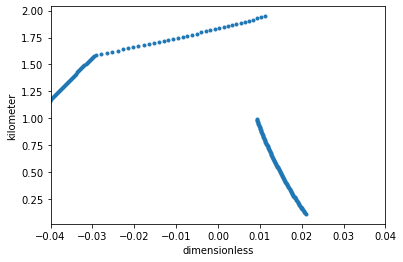

In [5]:
plt.plot(result.buoyancy, result.background_profile.altitude, '.')
plt.xlim(-0.04, 0.04)